<a href="https://colab.research.google.com/github/ladiaJeong/-01-classification/blob/master/%5B05%5D%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 가위바위보 분류기 만들기

In [ ]:
# 라이브러리 버전 확인 

import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)


2.6.0
1.21.4


In [ ]:
#데이터 불러오기

from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### resize 하기

In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")


In [ ]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [ ]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### load_data 함수 만들기 

In [ ]:
import numpy as np

def load_data(img_path, number_of_data = 300):
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


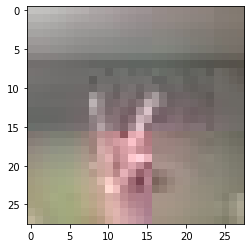

In [ ]:
# 이미지 불러오기 

import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  0


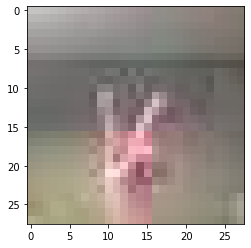

In [ ]:

import matplotlib.pyplot as plt

plt.imshow(x_train[50])
print('라벨: ', y_train[50])

In [ ]:
print(x_train.shape)

(300, 28, 28, 3)


### 딥러닝 네트워크 설계하기 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np



In [ ]:
n_channel_1=8
n_channel_2=16
n_dense=8
n_train_epoch=10

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 3208      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

### 학습시키기

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)




Epoch 1/10
10/10 [==============================] - 3s 11ms/step - loss: 4.8073 - accuracy: 0.5767
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0632 - accuracy: 0.7100
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7092 - accuracy: 0.8133
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8733
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.9167
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2036 - accuracy: 0.9433
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1793 - accuracy: 0.9433
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1919 - accuracy: 0.9567
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9700
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9833


## 1. 얼마나 잘 만들었는지 확인하기 (train 내 데이터 test 구글드라이브)

In [ ]:
#테스트 데이터 만들기 

import numpy as np

def load_data_2nd(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data_2nd(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [ ]:
# 훈련시킨 모델을 사용해서 test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 19.6215 - accuracy: 0.1667
test_loss: 19.621503829956055 
test_accuracy: 0.1666666716337204


In [ ]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.1879662e-27 5.9006446e-17 1.0000000e+00]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


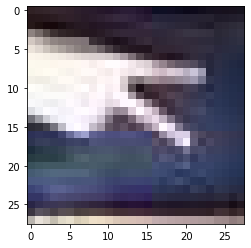

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [9.9987972e-01 4.6526583e-16 1.2031189e-04]
라벨: 2, 예측결과: 0


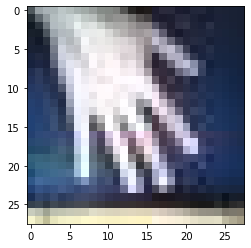

예측확률분포: [1.0000000e+00 3.6277562e-26 2.3271449e-16]
라벨: 2, 예측결과: 0


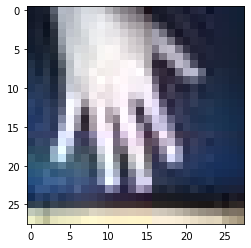

예측확률분포: [9.9995875e-01 5.8480143e-12 4.1301832e-05]
라벨: 1, 예측결과: 0


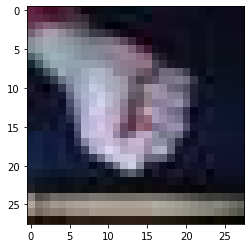

예측확률분포: [1.1984002e-24 3.3869455e-08 1.0000000e+00]
라벨: 1, 예측결과: 2


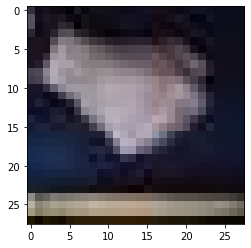

예측확률분포: [7.5747114e-01 2.4252318e-01 5.7084421e-06]
라벨: 2, 예측결과: 0


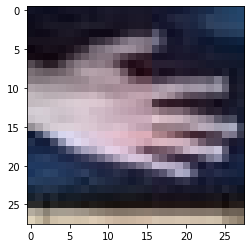

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### n_channel_1=8 /n_channel_2=16/ n_dense=8/ n_train_epoch=10
1. 값을 8-48까지 배수로 변화시켜 주고 에포치를 10-20까지 변화시켜 주면서 학습을 시켰다. 그중 학습율이 가장 좋은 값이다. 학습율이 좋을수록 정확도가 낮게 나오는 경향이 있었다.- 오버피팅 

2. 정확도가 0.25 으로 나와서 딥러닝에게 너무 실망했다. 얼마나 엉뚱하게 예측을 하는지 찾아보았더니... 테스트 셋으로 받은 사진 하단에 베이지색으로 이미지가 찍혀 있었다. 가위바위보를 하고 있는 손 색깔과 비슷한 베이지 색이 꽤나 많이 픽셀을 차지하고 있어서 예측을 잘 못하는건 아닌가 하는 생각이 들었다. 

3. 테스트 셋을 건드릴 수 는 없어서 두번째 방법으로 내가 테스트 셋을 따로 만들어 보았다. 

## 2. 얼마나 잘 만들었는지 확인하기 
(train: 내 데이터 1-100 test: 내가 만든 데이터 101-200 )

In [ ]:
# 데이터 사이즈 줄이기 

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
    

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor2"

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock2"

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper2"
resize_images(image_dir_path)


100  images to be resized.
100  images resized.


In [ ]:
#테스트 데이터 만들기 

import numpy as np

def load_data_2nd(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data_2nd(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


학습데이터(x_test)의 이미지 개수는 299 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [ ]:
# 훈련시킨 모델을 사용해서 test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 14.1693 - accuracy: 0.3333
test_loss: 14.169270515441895 
test_accuracy: 0.3333333432674408


In [ ]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [4.4982518e-20 9.9969363e-01 3.0636985e-04]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


#### 1. 내가 만든 테스트 셋은 같은 공간에서 사진 촬영을 했기 때문에 아무래도 배경부분의 픽셀이 비슷하게 처리되니 정확도가 2배 정도 높게 나왔다. 정확도가 낮은 원인은 학습할 데이터가 적어서 그런 것으로 좁혀 졌다. 

#### 2. 다른 그루들이 올린 데이터들로 데이터 양을 늘려서 다양한 데이터로 학습을 더 시켜 보기로 한다. 

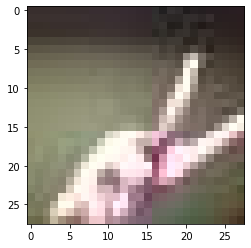

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [6.2825498e-24 9.9977165e-01 2.2839689e-04]
라벨: 0, 예측결과: 1


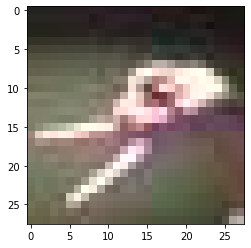

예측확률분포: [4.5377566e-10 3.5510404e-11 1.0000000e+00]
라벨: 0, 예측결과: 2


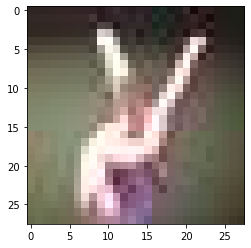

예측확률분포: [6.7495853e-22 9.9999976e-01 2.6694835e-07]
라벨: 0, 예측결과: 1


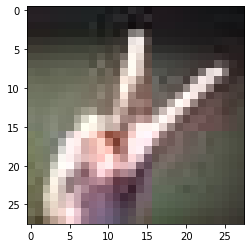

예측확률분포: [0.9897996  0.00679891 0.00340155]
라벨: 2, 예측결과: 0


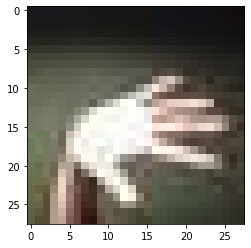

예측확률분포: [9.9986148e-01 1.4638643e-07 1.3836946e-04]
라벨: 2, 예측결과: 0


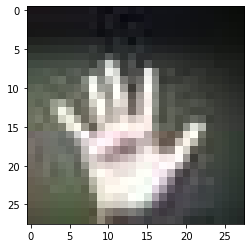

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 3. train 데이터 양 늘리기

In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor3"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock3"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper3"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

499  images to be resized.
499  images resized.
가위 이미지 resize 완료!
500  images to be resized.
500  images resized.
바위 이미지 resize 완료!
500  images to be resized.
500  images resized.
보 이미지 resize 완료!


In [ ]:
#학습 데이터 만들기 
import numpy as np

def load_data(img_path, number_of_data = 1499):
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1499 입니다.
x_train shape: (1499, 28, 28, 3)
y_train shape: (1499,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [ ]:
n_channel_1=8
n_channel_2=16
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))



model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                12832     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)


Epoch 1/15
47/47 [==============================] - 0s 3ms/step - loss: 5.2996 - accuracy: 0.5063
Epoch 2/15
47/47 [==============================] - 0s 3ms/step - loss: 1.3022 - accuracy: 0.7098
Epoch 3/15
47/47 [==============================] - 0s 3ms/step - loss: 0.8746 - accuracy: 0.7572
Epoch 4/15
47/47 [==============================] - 0s 3ms/step - loss: 0.5606 - accuracy: 0.8406
Epoch 5/15
47/47 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 0.8899
Epoch 6/15
47/47 [==============================] - 0s 3ms/step - loss: 0.2734 - accuracy: 0.9106
Epoch 7/15
47/47 [==============================] - 0s 3ms/step - loss: 0.2361 - accuracy: 0.9219
Epoch 8/15
47/47 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9320
Epoch 9/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1658 - accuracy: 0.9440
Epoch 10/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.9573
Epoch 11/15
47/47 [

## 4. 얼마나 잘 만들었는지 확인하기 
(train: 그루들 데이터 500 test:100 )

In [ ]:
import numpy as np

def load_data_2nd(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data_2nd(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 299 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [ ]:
# 훈련시킨 모델을 사용해서 test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.0636 - accuracy: 0.9733
test_loss: 0.06357637792825699 
test_accuracy: 0.9733333587646484


예측확률분포: [0.00745172 0.8231799  0.16936839]
라벨: 0, 예측결과: 1


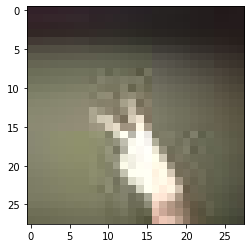

예측확률분포: [0.         0.00631702 0.993683  ]
라벨: 1, 예측결과: 2


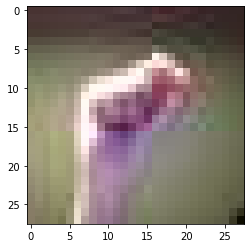

예측확률분포: [3.9962908e-11 1.7923242e-06 9.9999821e-01]
라벨: 0, 예측결과: 2


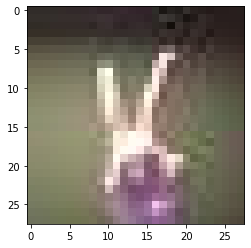

예측확률분포: [0.0000000e+00 9.9994397e-01 5.6082456e-05]
라벨: 0, 예측결과: 1


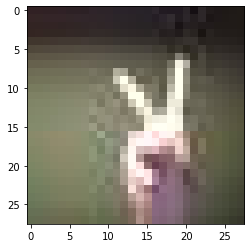

예측확률분포: [9.9999869e-01 1.2678596e-15 1.3000106e-06]
라벨: 2, 예측결과: 0


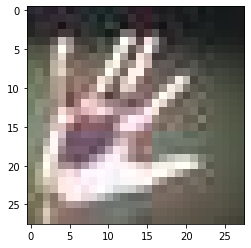

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 회고 


1. 이미지 분류기 모델 만들기 

-내가 만든 데이터 100 / 주어진 테스트 데이터 100
-내가 만든 데이터 100 / 내가 만든 테스트 데이터 100
-그루들이 만든 데이터 500 / 내가 만든 테스트 데이터 100




2. 오버 피팅 극복을 위한 시도 

- 하이퍼 파라미터 바꾸기(첫번째 분류기) 8~48까지 값에서 시도하였다. / 학습도 20회 이하로 제한하여 테스트 하였다. 차원의 저주의 위험성을 생각하며 세팅하였다. 

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

test_loss: 8.746025085449219 
test_accuracy: 0.5366666913032532
    
    
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

10/10 - 0s - loss: 11.7957 - accuracy: 0.2900
test_loss: 11.795746803283691 
test_accuracy: 0.28999999165534973


- 데이터 셋의 다양성으로 실험하기 

*내가 만든 데이터 100 / 주어진 테스트 데이터 100
*내가 만든 데이터 100 / 내가 만든 테스트 데이터 100
*그루들이 만든 데이터 500 / 내가 만든 테스트 데이터 100


3. 3번째 분류기에서 90% 이상 달성 


4. n_channel_1=8 /n_channel_2=16/ n_dense=8/ n_train_epoch=10
값을 8-48까지 배수로 변화시켜 주고 에포치를 10-20까지 변화시켜 주면서 학습을 시켰다. 그중 학습율이 가장 좋은 값이다. 학습율이 좋을수록 정확도가 낮게 나오는 경향이 있었다.- 오버피팅이라 판단되었다.

첫번째 분류기 정확도가 0.25 으로 나와서 딥러닝에게 너무 실망했다. 얼마나 엉뚱하게 예측을 하는지 찾아보았더니... 테스트 셋으로 받은 사진 하단에 베이지색으로 이미지가 찍혀 있었다. 가위바위보를 하고 있는 손 색깔과 비슷한 베이지 색이 꽤나 많이 픽셀을 차지하고 있어서 예측을 잘 못하는건 아닌가 하는 생각이 들었다.

테스트 셋을 건드릴 수 는 없어서 두번째 방법으로 내가 테스트 셋을 따로 만들어 보았다. - 배경이 같은 조건이라 같은 조건에서는 정확도가 높을 수 있지만, 다른 데이터 셋에 사용하기에 부적합할 것으로 판단되었다- 오버피팅이라 판단됨.

5. 학습은 다양성을 바탕으로 시키는 것이 오버피팅도 막고, 하이퍼파라미터를 잘 맞추어서 학습 시켜 놓았을때 정확도에 의미가 있다 판단된다.픽셀 한칸한칸이 의미가 있다보니 배경색이나 주변 환경이 이미지에 담기면 그것도 큰 변수로 작용한다. 이를 막는 것은 어려우니 보다 다양한 데이터, 데이터 양을 늘려 학습시켜야 쓸만한 모델이 된다는 것을 배웠다.  

6.가장 정확도가 높았던 모델은 그루들의 이미지를 모은 트레인과 내가 만든 테스트 셋이었다. 